<a href="https://colab.research.google.com/github/nadya-az/digital_image_processing/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%964.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install imageai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


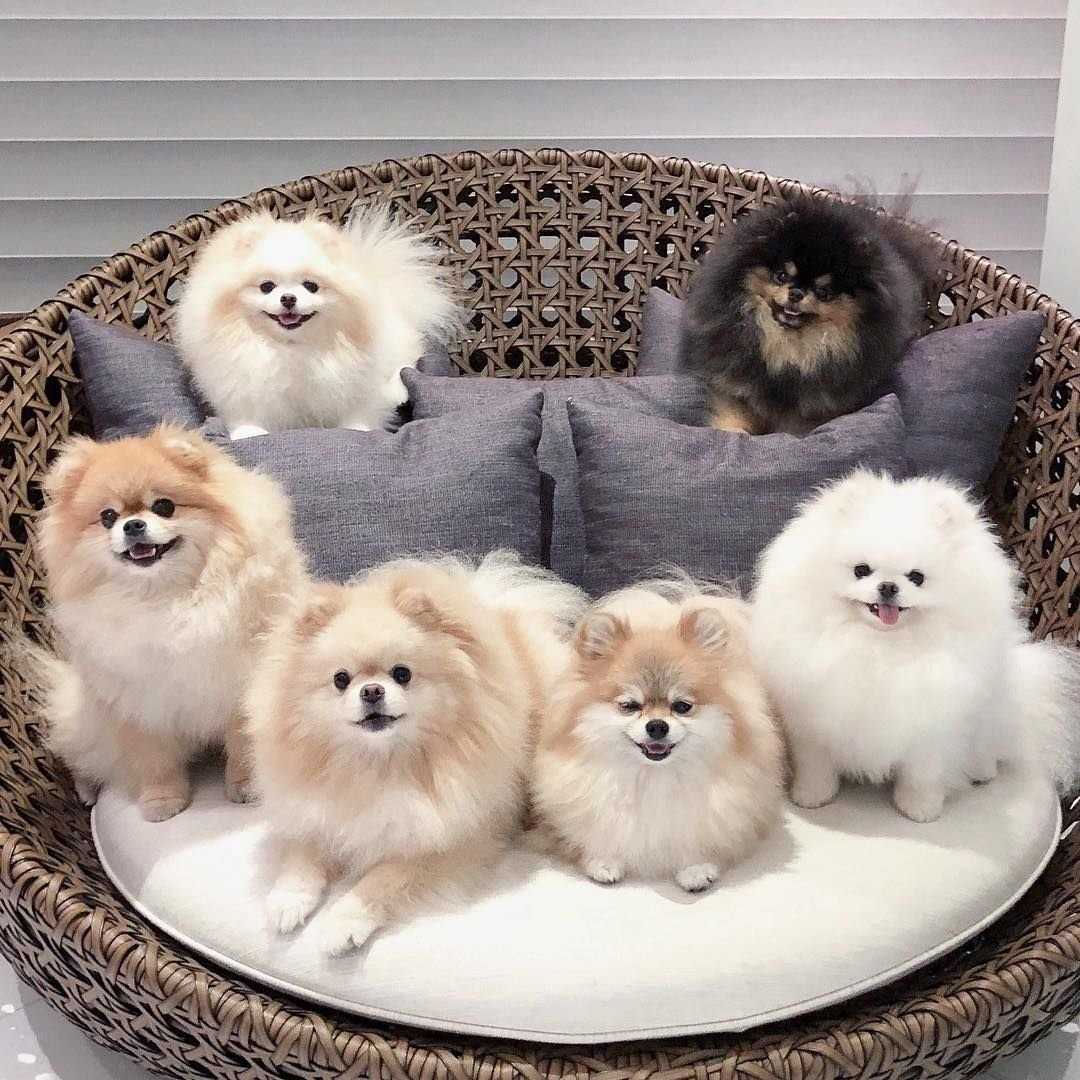

In [21]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from urllib.request import urlopen
req = urlopen('https://funart.pro/uploads/posts/2022-06/1654473174_58-funart-pro-p-ozhirenie-u-shpitsa-zhivotnie-krasivo-foto-62.jpg') # используя метод urlopen, получаем объект запроса по ссылке (изображение)
                                                                                      # и сохраняем его в виде потокового набора данных в переменную "req"

image_2 = np.asarray(bytearray(req.read()), dtype=np.uint8) # преобразуем потоковый набор данных в массив numpy
image_2 = cv2.imdecode(image_2, -1) # декодируем изображение в привычный для отображения формат

cv2_imshow(image_2)

[{'name': 'cat', 'percentage_probability': 90.34, 'box_points': [662, 192, 930, 426]}, {'name': 'dog', 'percentage_probability': 99.71, 'box_points': [519, 566, 785, 893]}, {'name': 'dog', 'percentage_probability': 94.67, 'box_points': [744, 467, 1061, 826]}, {'name': 'dog', 'percentage_probability': 95.31, 'box_points': [248, 555, 554, 965]}, {'name': 'dog', 'percentage_probability': 96.77, 'box_points': [45, 434, 328, 810]}, {'name': 'bed', 'percentage_probability': 90.09, 'box_points': [0, 133, 1080, 1080]}]


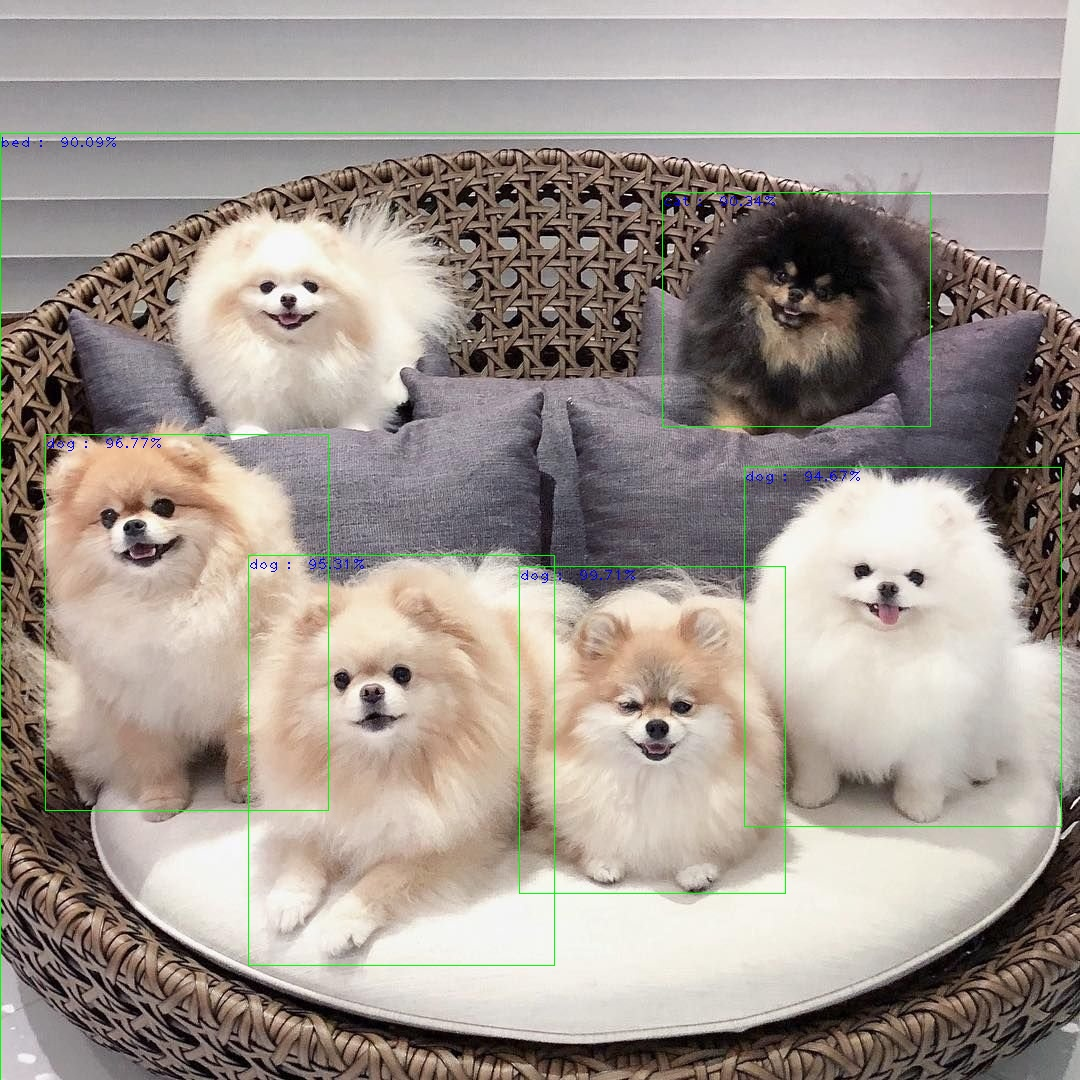

In [23]:
from imageai.Detection import ObjectDetection # Импортируем из библиотеки imageai класс ObjectDetection для поиска объектов
import os # Импортируем библиотеку os для взаимодействия с ОС

exec_path = os.getcwd()# Объявляем переменную exec_path и помещаем в неё функцию os.getcwd()для указания пути к данному проекту (для удобства работы с файлами, находящимися в корневой папке проекта)

detector = ObjectDetection() # создаем объект класса ObjectDetection
detector.setModelTypeAsYOLOv3() # обращаемся к методу setModelTypeAsRetinaNet, тем самым устанавливая для использования в проекте модель RetinaNet для распознавания объектов
detector.setModelPath("/content/drive/MyDrive/yolov3.pt") # указываем путь к модели (предварительно модель необходимо скачать с официального сайта ImageAI и поместить в корневую папку проекта)
detector.loadModel() # загружаем модель

list = detector.detectObjectsFromImage( # используем метод detectObjectsFromImage для обнаружения объектов на изображении
    input_image=image_2, # указываем путь к исходному изображению, либо имя переменной, которая уже содержит изображение
    output_image_path=os.path.join(exec_path, "new_objects.jpg"), # указываем имя и путь для сохранения распознанного изображения
    minimum_percentage_probability=60, # дополнительная характеристика, отвечающая за процент точности распознавания объекта. В данном случае, если точность объекта будет меньше, чем 60%, то в конечной выборке он присутствовать не будет
    display_percentage_probability=True, # отображение процента точности в конечном изображении
    display_object_name=True # отображение класса объекта в конечном изображении
)

print(list)
output_image = cv2.imread("/content/new_objects.jpg")
cv2_imshow(output_image)

2 задание 